In [2]:
import pandas as pd
import seaborn as sns
import math 
from scipy import stats as st

# Загрузка датасетов из репозитория github

In [4]:
cardio_alco = pd.read_csv('https://raw.githubusercontent.com/voleka-ocrv/turing_data_analyst/main/cardio_alco.csv', sep=';')
cardio_base = pd.read_csv('https://raw.githubusercontent.com/voleka-ocrv/turing_data_analyst/main/cardio_base.csv')

covid = pd.read_csv('https://raw.githubusercontent.com/voleka-ocrv/turing_data_analyst/main/covid_data.csv')

# Question 1: 
Which country has the 3rd death rate? Death rate: total number of death per million inhabitants.
- [ ] Italy
- [x] Andorra
- [ ] USA
- [ ] Belgium
- [ ] Spain

In [17]:
covid_death_rate = covid.groupby('location').agg(
    total_death=pd.NamedAgg('new_deaths', 'sum'), 
    inhabitants=pd.NamedAgg('population', 'max'),
    )

covid_death_rate['death_rate'] = covid_death_rate['total_death']/(covid_death_rate['inhabitants']/1e6)

covid_death_rate.sort_values('death_rate', ascending=False).head(3)


,total_death,inhabitants,death_rate
location,,,
San Marino,42,33938.0,1237.550828
Belgium,9619,11589616.0,829.967102
Andorra,51,77265.0,660.066007


# Question 2: 

How tall are the tallest 1% of people?
- [ ] They are taller than 186 cm
- [ ] They are taller than 175 cm
- [ ] They are taller than 147 cm
- [x] They are taller than 184 cm
- [ ] They are taller than 191 cm

In [18]:
cardio_base['height'].quantile(0.99)

184.0

# Question 3: 

Which two features have the highest spearman rank correlation?
- [ ] Age and weight
- [ ] Age and blood preasure
- [x] Blood preasure levels (ap_hi, ap_low)
- [x] Gender and height

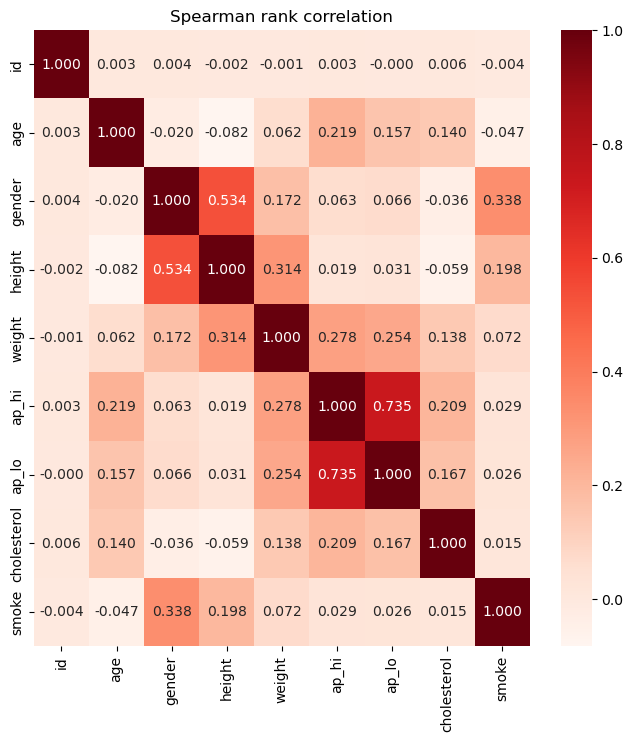

In [69]:
spearman_corr = cardio_base.corr(method='spearman')

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_title("Spearman rank correlation")
sns.heatmap(spearman_corr, annot=True, fmt='.3f', cmap="Reds");

# Question 4: 
Do people over 50 have higher cholesterol levels than the rest?
- [ ] Yes, their cholesterol level is 29% higher on average
- [x] No, it's about the same
- [ ] No, people over 50 have 7% lower cholesterol level
- [ ] Yes, their cholesterol level is 14% higher on average
- [ ] Yes, their cholesterol level is 19% higher on average

In [ ]:
# Note: In the original file Age is in days, we should calculate with age in years rounded down.
cardio_base['age'] = cardio_base['age'].transform(lambda x: int(math.floor(x/365)), axis=0)

In [100]:
cardio_base['cholesterol'].where(cardio_base['age'] > 50).mean()/cardio_base['cholesterol'].mean() - 1

0.04718033578232861

# Question 5: 
How much heavier the age group with the highest average weight than the age group with the lowest average weight?
- [ ] 45% havier
- [x] 28% havier
- [ ] 13% havier
- [ ] 87% havier
- [ ] 9% havier

In [129]:
heavier_age_group = cardio_base.groupby('age')['weight'].mean().agg(['min', 'max'])
heavier_age_group['max'] / heavier_age_group['min'] - 1

0.2859952671226089

# Question 6: 
Which of the following statements is true with 95% confidence?
- [ ] Smokers have higher blood preassure than non-smokers
- [x] Smokers have higher cholisterol level than non-smokers
- [ ] Smokers weight less than non-smokers
- [x] Men have higher blood preassure than women (???)

In [6]:
alpha = .05

### Smokers have higher blood preassure than non-smokers
False

In [26]:
print('''H0: Smokers and non-smokers have the same blood pressure\nH1: Smokers have higher blood preassure than non-smokers''')
sample_1 = cardio_base[cardio_base['smoke'] == 1]['ap_hi'] # smokeres
sample_2 = cardio_base[cardio_base['smoke'] == 0]['ap_hi'] # non-smokeres

results = st.ttest_ind(sample_1, sample_2, equal_var = False)

print('p-значение: ', results.pvalue)
print('p-значение / 2: ', results.pvalue / 2)
print(f"Smokers: {sample_1.mean():.3f}\nNon-smokers: {sample_2.mean():.3f}")


if results.pvalue < alpha / 2 and sample_1 and sample_1.mean() > sample_2.mean():
    print('Reject null hypothesis H0')
else:
    print('Do not reject null hypothesis H0')

H0: Smokers and non-smokers have the same blood pressure
H1: Smokers have higher blood preassure than non-smokers
p-значение:  0.461244784929987
p-значение / 2:  0.2306223924649935
Smokers: 128.361
Non-smokers: 128.861
Do not reject null hypothesis H0


In [27]:
print('''H0: Smokers and non-smokers have the same blood pressure\nH1: Smokers have higher blood preassure than non-smokers''')
sample_1 = cardio_base[cardio_base['smoke'] == 1]['ap_lo'] # smokeres
sample_2 = cardio_base[cardio_base['smoke'] == 0]['ap_lo'] # non-smokeres

results = st.ttest_ind(sample_1, sample_2, equal_var = False)

print('p-значение: ', results.pvalue)
print('p-значение / 2: ', results.pvalue / 2)
print(f"Smokers: {sample_1.mean():.3f}\nNon-smokers: {sample_2.mean():.3f}")


if results.pvalue < alpha / 2 and sample_1 and sample_1.mean() > sample_2.mean():
    print('Reject null hypothesis H0')
else:
    print('Do not reject null hypothesis H0')

H0: Smokers and non-smokers have the same blood pressure
H1: Smokers have higher blood preassure than non-smokers
p-значение:  0.13044186949533218
p-значение / 2:  0.06522093474766609
Smokers: 99.775
Non-smokers: 96.327
Do not reject null hypothesis H0


### Smokers have higher cholisterol level than non-smokers
True

In [21]:
print('''H0: Smokers and non-smokers have the same cholisterol level\nH1: Smokers have higher cholisterol level than non-smokers''')
sample_1 = cardio_base[cardio_base['smoke'] == 1]['cholesterol'] # smokeres
sample_2 = cardio_base[cardio_base['smoke'] == 0]['cholesterol'] # non-smokeres
results = st.ttest_ind(sample_1, sample_2, equal_var = False)

print('p-значение: ', results.pvalue)
print('p-значение / 2: ', results.pvalue / 2)
print(f"Smokers: {sample_1.mean():.3f}\nNon-smokers: {sample_2.mean():.3f}")

if results.pvalue < alpha / 2 and sample_1.mean() > sample_2.mean():
    print('Reject null hypothesis H0')
else:
    print('Do not reject null hypothesis H0')

H0: Smokers and non-smokers have the same cholisterol level
H1: Smokers have higher cholisterol level than non-smokers
p-значение:  0.006222972569800228
p-значение / 2:  0.003111486284900114
Smokers: 1.390
Non-smokers: 1.365
Reject null hypothesis H0


### Smokers weight less than non-smokers
False

In [22]:
print('''H0: Smokers and non-smokers have the same weight\nH1: Smokers weight less than non-smokers''')
sample_1 = cardio_base[cardio_base['smoke'] == 1]['weight'] # smokeres
sample_2 = cardio_base[cardio_base['smoke'] == 0]['weight'] # non-smokeres
results = st.ttest_ind(sample_1, sample_2, equal_var = False)

print('p-значение: ', results.pvalue)
print('p-значение / 2: ', results.pvalue / 2)
print(f"Smokers: {sample_1.mean():.3f}\nNon-smokers: {sample_2.mean():.3f}")

if results.pvalue < alpha / 2 and sample_1.mean() < sample_2.mean():
    print('Reject null hypothesis H0')
else:
    print('Do not reject null hypothesis H0')

H0: Smokers and non-smokers have the same weight
H1: Smokers weight less than non-smokers
p-значение:  1.6785734402177582e-65
p-значение / 2:  8.392867201088791e-66
Smokers: 77.344
Non-smokers: 73.902
Do not reject null hypothesis H0


### Men have higher blood preassure than women (???)
True

Note: Gender 1 - female, 2 - male.

In [28]:
print('''H0: Men and women have the same blood pressure\nH1: Men have higher blood pressure than women''')
sample_1 = cardio_base[cardio_base['gender'] == 1]['ap_hi'] # women
sample_2 = cardio_base[cardio_base['gender'] == 2]['ap_hi'] # men
results = st.ttest_ind(sample_1, sample_2, equal_var = False)

print('p-значение: ', results.pvalue)
print('p-значение / 2: ', results.pvalue / 2)
print(f"Smokers: {sample_1.mean():.3f}\nNon-smokers: {sample_2.mean():.3f}")

if results.pvalue < alpha / 2 and sample_1.mean() < sample_2.mean():
    print('Reject null hypothesis H0')
else:
    print('Do not reject null hypothesis H0')

H0: Men and women have the same blood pressure
H1: Men have higher blood pressure than women
p-значение:  0.1038392595181402
p-значение / 2:  0.0519196297590701
Smokers: 128.139
Non-smokers: 130.079
Do not reject null hypothesis H0


Too small distinguish between p-value and alpha. So I'd reject H0 here.

In [29]:
print('''H0: Men and women have the same blood pressure\nH1: Men have higher blood pressure than women''')
sample_1 = cardio_base[cardio_base['gender'] == 1]['ap_lo'] # women
sample_2 = cardio_base[cardio_base['gender'] == 2]['ap_lo'] # men
results = st.ttest_ind(sample_1, sample_2, equal_var = False)

print('p-значение: ', results.pvalue)
print('p-значение / 2: ', results.pvalue / 2)
print(f"Smokers: {sample_1.mean():.3f}\nNon-smokers: {sample_2.mean():.3f}")

if results.pvalue < alpha / 2 and sample_1.mean() < sample_2.mean():
    print('Reject null hypothesis H0')
else:
    print('Do not reject null hypothesis H0')

H0: Men and women have the same blood pressure
H1: Men have higher blood pressure than women
p-значение:  0.00013735011856314677
p-значение / 2:  6.867505928157339e-05
Smokers: 94.523
Non-smokers: 100.552
Reject null hypothesis H0
